## DATA SCIENCE

Group 17

Daniel Lucas  
Ricardo Nobre  
Ricardo Carvalho  
Diogo Torneiro  
Vasco Pombo  

### Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import date

import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [32]:
original_data = pd.read_csv('cluster.csv')

In [33]:
df = original_data.copy()

In [34]:
df.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


| Variable      | Description |
| ----------- | ----------- |
| Name      | Customer’s name       |
| Year Birth    | Customer’s birth year        |
| Longevity   | Whether the customer registered more than 1 year ago or not        |
| Churn   | Whether the customer churned or not (churn or nochurn)        |
| TypeTravel   | Customer’s reason for travelling (business or leisure)        |
| RoomType   | Type of room reserved        |
| RewardPoints   | Customer’s rewarding point for loyalty        |
| Comfort   | Satisfaction level of customer regarding comfort of the room (0 to 5)        |
| ReceptionSchedule   | Satisfaction level of customer regarding reception schedule (0 to 5)        |
| ReceptionSchedule   | Satisfaction level of customer regarding food and drink available (0 to 5)        |
| Location   |   Satisfaction level of customer regarding accommodation location (0 to 5)      |
| Wifi   |    Satisfaction level of customer regarding wi-fi service (0 to 5)     |
| Amenities   | Satisfaction level of customer regarding accommodation amenities(0 to 5)        |
| Staff   | Satisfaction level of customer regarding staff (0 to 5)        |
| OnlineBooking   | Satisfaction level of customer regarding online booking ease(0 to 5)        |
| PriceQuality   | Satisfaction level of customer regarding price quality relationship (0 to 5)        |
| RoomSpace   | Satisfaction level of customer regarding room space (0 to 5)        |
| CheckOut   | Satisfaction level of customer regarding check-out (0 to 5)        |
| CheckIn   | Satisfaction level of customer regarding check-in (0 to 5)        |
| Cleanliness   | Satisfaction level of customer regarding cleanliness (0 to 5)        |
| BarService   | Satisfaction level of customer regarding bar service (0 to 5)        |

## CRISP-DM

### 1. Data Understanding

#### 1.1 Dataframe Size

In [35]:
df_original_row_size = df.shape[0]
df_original_columns_size = df.shape[1]

print("Dataframe has", df_original_row_size, "rows and", df_original_columns_size, "columns")

Dataframe has 15589 rows and 21 columns


#### 1.2 Dataframe Info and Description

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0
RewardPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0
Comfort,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0
FoodDrink,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0
Location,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0
Wifi,15589.0,3.245109,1.327026,0.0,2.0,3.0,4.0,6.0
Amenities,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0
Staff,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0
OnlineBooking,15589.0,3.454231,1.310343,0.0,2.0,4.0,5.0,5.0


On a first look, we noticed the ranges of each variable look acceptable. However, some variables have different scales than others and this must be handled later on.

#### 1.2.1 Variable Analysis and Congruence Checks

#### 1.2.1.1 Churn

In [38]:
df['Churn'].value_counts()

nochurn    8477
churn      7112
Name: Churn, dtype: int64

Variable looks good to us, we will create dummies for it to make it numerical.

<AxesSubplot:xlabel='Churn', ylabel='count'>

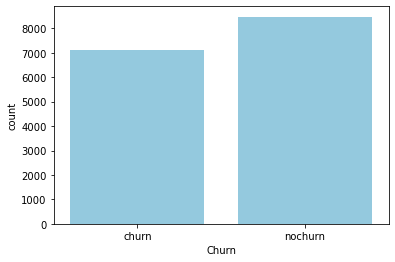

In [39]:
sns.countplot(df["Churn"], color="skyblue")

#### 1.2.1.2 Name

In [40]:
df['Name'].value_counts()

Mr. Michael Smith    9
Ms. Amanda Smith     7
Mr. John Smith       7
Mr. Michael Jones    6
Mr. William Smith    6
                    ..
Ms. Laurie Smith     1
Mr. Aaron Cox        1
Ms. Natasha Estes    1
Ms. Beverly Lee      1
Mr. Steven Mendez    1
Name: Name, Length: 14227, dtype: int64

Variable looks good tu us and based on the prefix before the name, we can create a new variable called gender.

In [41]:
df["Characters"] = df["Name"].str[:3]
df['Characters'].unique()


array(['Ms.', 'Mr.'], dtype=object)

In [42]:
df.drop(columns=["Characters"], axis=1, inplace=True)
df['Gender'] = [1 if i == 'Mr.' else 0 for i in df["Name"].str[:3]]

In [43]:
df.drop(columns=['Name'], inplace=True)

#### 1.2.1.3 Longevity

In [44]:
df['Longevity'].value_counts()

yes    12548
no      2874
y        167
Name: Longevity, dtype: int64

Variable does not look good because we have entries with 'yes' and entries with 'y' which most likely mean the same. Will will transform the entries with 'y' into 'yes'

In [45]:
df['Longevity'].replace('y','yes', inplace=True)

In [46]:
df['Longevity'].value_counts()

yes    12715
no      2874
Name: Longevity, dtype: int64

<AxesSubplot:xlabel='Longevity', ylabel='count'>

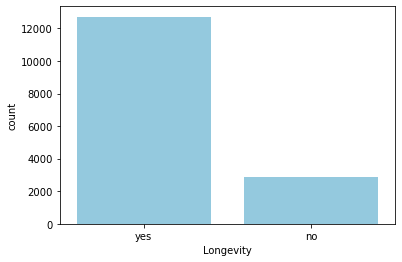

In [47]:
sns.countplot(df["Longevity"], color="skyblue")

#### 1.2.1.4 Year Birth

In [48]:
df['Year_Birth'].value_counts()

1982.0    441
1996.0    416
1980.0    383
1998.0    380
1981.0    369
         ... 
1947.0      9
1945.0      8
1943.0      6
1942.0      3
1936.0      2
Name: Year_Birth, Length: 75, dtype: int64

Variable has missing values. We will handle these missing values and then create a new variable called Age based on this

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

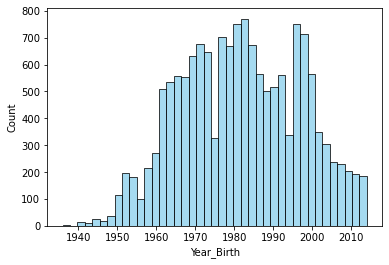

In [49]:
sns.histplot(df["Year_Birth"], color="skyblue")

#### 1.2.1.5 Type Travel

In [50]:
df['TypeTravel'].value_counts()

business    10756
leisure      4833
Name: TypeTravel, dtype: int64

Variable looks good to us and we will create dummies for it

<AxesSubplot:xlabel='TypeTravel', ylabel='count'>

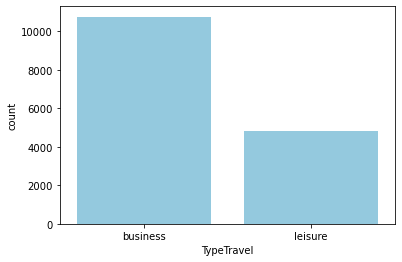

In [51]:
sns.countplot(df["TypeTravel"], color="skyblue")

#### 1.2.1.6 Room Type

In [52]:
df['RoomType'].value_counts()

single    7442
double    7021
suite     1126
Name: RoomType, dtype: int64

Variable looks good to us and we will create dummies for it

<AxesSubplot:xlabel='RoomType', ylabel='count'>

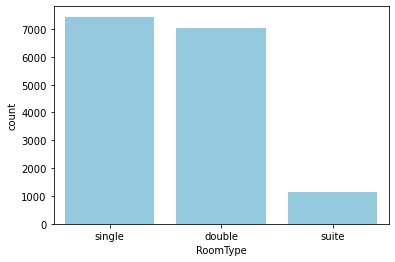

In [53]:
sns.countplot(df["RoomType"], color="skyblue")

#### 1.2.1.7 RewardPoints

In [54]:
df['RewardPoints'].value_counts()

5286    19
5010    17
5347    16
5094    16
4942    16
        ..
3656     1
2524     1
5974     1
3802     1
3304     1
Name: RewardPoints, Length: 4061, dtype: int64

Variable looks good to us, but because of the scale we will have to normalize all the variables in the dataframe

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

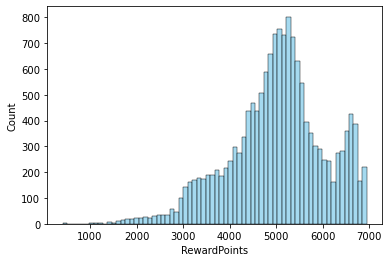

In [55]:
sns.histplot(df["RewardPoints"], color="skyblue")

#### 1.2.1.8 Ratings

All ratings variables look ok to us

<AxesSubplot:xlabel='BarService', ylabel='Count'>

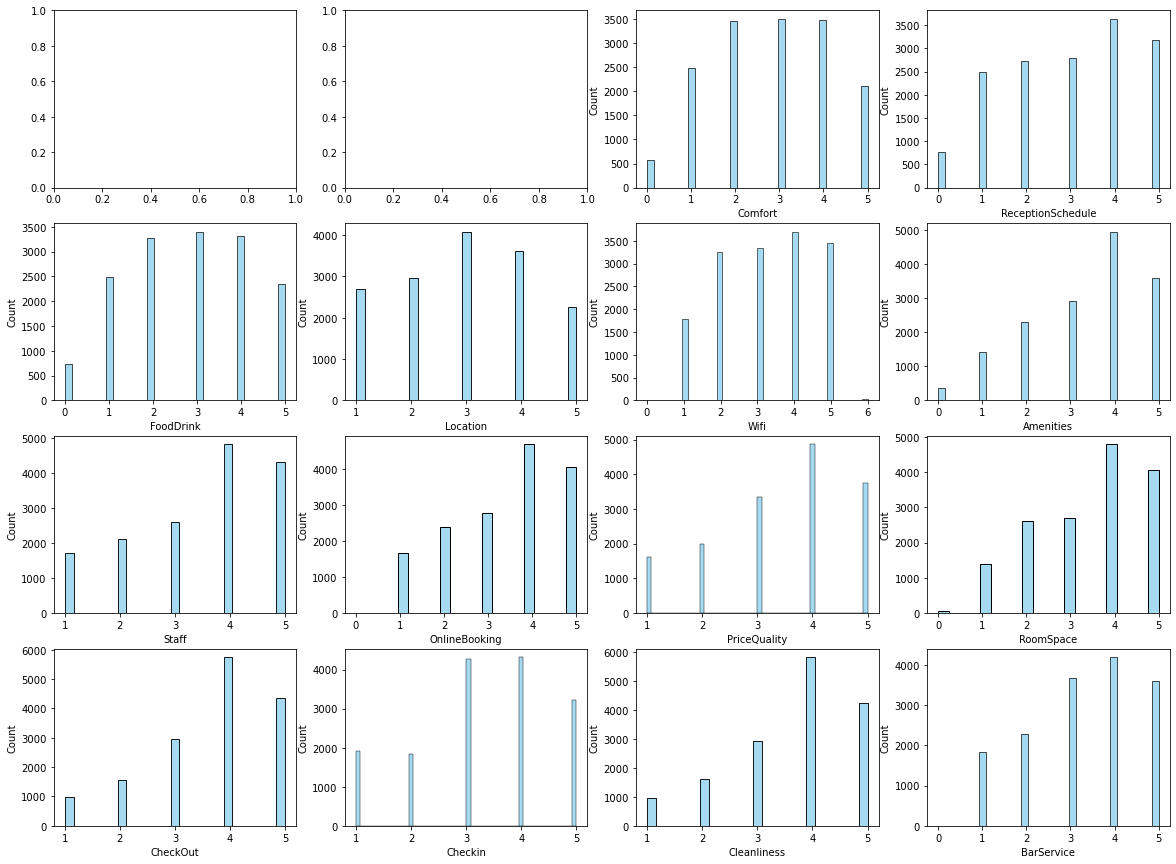

In [56]:
f, axes = plt.subplots(4,4, figsize=(20, 15), squeeze=False)  
sns.histplot(df["Comfort"], color="skyblue", ax=axes[0, 2])
sns.histplot(df["ReceptionSchedule"], color="skyblue", ax=axes[0, 3])
sns.histplot(df["FoodDrink"], color="skyblue", ax=axes[1, 0])
sns.histplot(df["Location"], color="skyblue", ax=axes[1, 1])
sns.histplot(df["Wifi"], color="skyblue", ax=axes[1, 2])
sns.histplot(df["Amenities"], color="skyblue", ax=axes[1, 3])
sns.histplot(df["Staff"], color="skyblue", ax=axes[2, 0])
sns.histplot(df["OnlineBooking"], color="skyblue", ax=axes[2, 1])
sns.histplot(df["PriceQuality"], color="skyblue", ax=axes[2, 2])
sns.histplot(df["RoomSpace"], color="skyblue", ax=axes[2, 3])
sns.histplot(df["CheckOut"], color="skyblue", ax=axes[3, 0])
sns.histplot(df["Checkin"], color="skyblue", ax=axes[3, 1])
sns.histplot(df["Cleanliness"], color="skyblue", ax=axes[3, 2])
sns.histplot(df["BarService"], color="skyblue", ax=axes[3, 3])

Upon looking at the charts, we noticed that 'Wifi' has values that should not be there, in particular, some surveys were marked with 6 which is not an available rating. 

In [57]:
df['Wifi'].value_counts()

4    3704
5    3446
3    3348
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

Since there are only 36 rows with value 6, we will convert them to a 5.

In [58]:
df['Wifi'].replace(6,5, inplace=True)

In [59]:
df['Wifi'].value_counts()

4    3704
5    3482
3    3348
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

<AxesSubplot:xlabel='Wifi', ylabel='Count'>

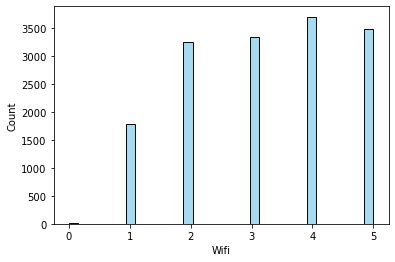

In [60]:
sns.histplot(df["Wifi"], color="skyblue")

#### 1.2.2 Outlier Observation Using Box Plot Chart

<AxesSubplot:xlabel='BarService'>

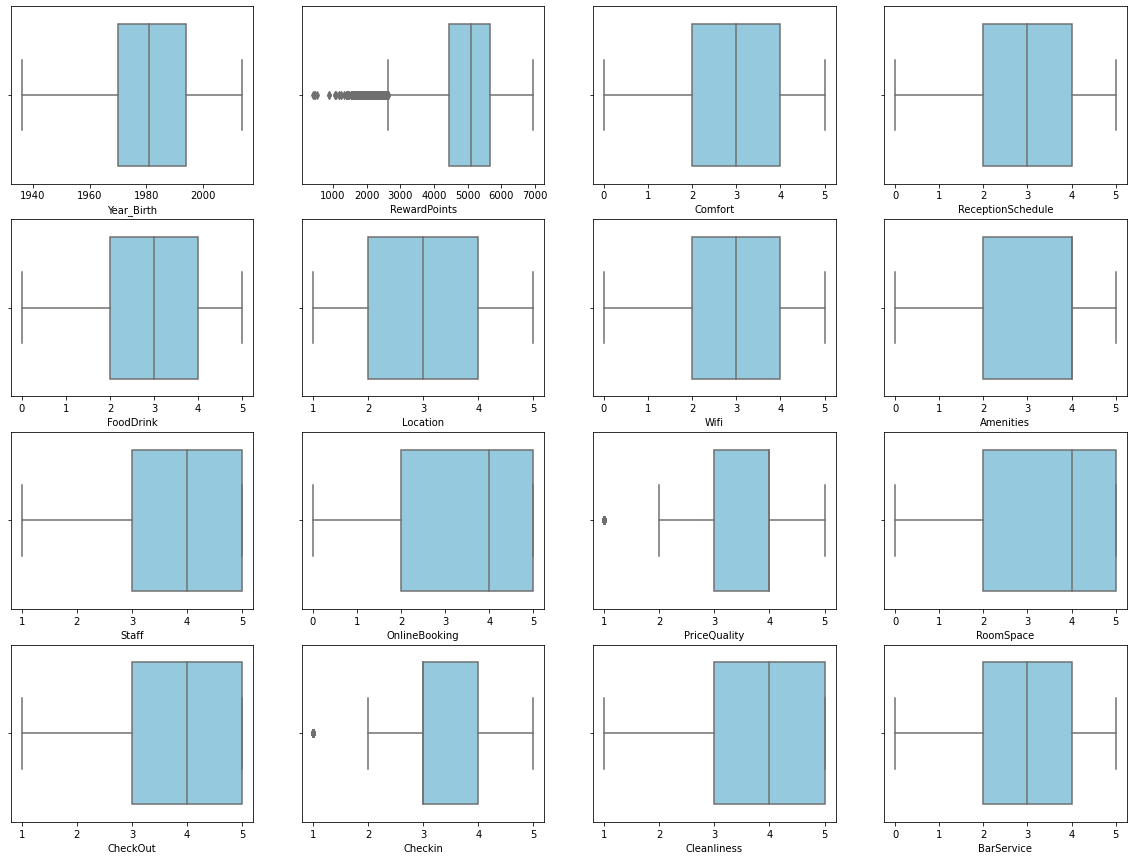

In [61]:
f, axes = plt.subplots(4,4, figsize=(20, 15), squeeze=False)    
sns.boxplot(df["Year_Birth"], color="skyblue", ax=axes[0, 0])
sns.boxplot(df["RewardPoints"], color="skyblue", ax=axes[0, 1])
sns.boxplot(df["Comfort"], color="skyblue", ax=axes[0, 2])
sns.boxplot(df["ReceptionSchedule"], color="skyblue", ax=axes[0, 3])
sns.boxplot(df["FoodDrink"], color="skyblue", ax=axes[1, 0])
sns.boxplot(df["Location"], color="skyblue", ax=axes[1, 1])
sns.boxplot(df["Wifi"], color="skyblue", ax=axes[1, 2])
sns.boxplot(df["Amenities"], color="skyblue", ax=axes[1, 3])
sns.boxplot(df["Staff"], color="skyblue", ax=axes[2, 0])
sns.boxplot(df["OnlineBooking"], color="skyblue", ax=axes[2, 1])
sns.boxplot(df["PriceQuality"], color="skyblue", ax=axes[2, 2])
sns.boxplot(df["RoomSpace"], color="skyblue", ax=axes[2, 3])
sns.boxplot(df["CheckOut"], color="skyblue", ax=axes[3, 0])
sns.boxplot(df["Checkin"], color="skyblue", ax=axes[3, 1])
sns.boxplot(df["Cleanliness"], color="skyblue", ax=axes[3, 2])
sns.boxplot(df["BarService"], color="skyblue", ax=axes[3, 3])

Looking at the box plots of all variables, we noticed 3 variables with possible outliers. These are: RewardPoints, PriceQuality, Checkin. These outliers will be handled later on.

#### 1.2.3 Pairplot of all variables of the dataframe

In [62]:
#sns.pairplot(df)

#### 1.2.4 Skewness of the variables of the Dataframe

In [63]:
df.skew()

Year_Birth          -0.003847
RewardPoints        -0.453779
Comfort             -0.100907
ReceptionSchedule   -0.260705
FoodDrink           -0.123610
Location            -0.050229
Wifi                -0.183010
Amenities           -0.599498
Staff               -0.554561
OnlineBooking       -0.472074
PriceQuality        -0.503381
RoomSpace           -0.482952
CheckOut            -0.750689
Checkin             -0.382588
Cleanliness         -0.745131
BarService          -0.358297
Gender               0.048900
dtype: float64

TODO: Analyze these results

#### 1.3 Missing Values

In [64]:
df.isna().sum()

Churn                  0
Longevity              0
Year_Birth           195
TypeTravel             0
RoomType               0
RewardPoints           0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
Gender                 0
dtype: int64

Year of Birth is the only variable with missing values. We have different methods to fill in these missing values like using the mode, mean or KNN Inputer. We decided to fill these missing values with the mode.

In [65]:
#df.fillna(int(df['Year_Birth'].mode()), inplace=True)
#print(int(df['Year_Birth'].mode())

import numpy as np

df_dropped = df.drop(columns=['Churn', 'RoomType', 'Longevity', 'TypeTravel'])

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer_matrix = imputer.fit_transform(df_dropped)

data_cleaned = pd.DataFrame(data=imputer_matrix, columns = df_dropped.columns, index = df_dropped.index)
df['Year_Birth'] = data_cleaned['Year_Birth']

In [66]:
df.isna().sum()

Churn                0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
Gender               0
dtype: int64

In [67]:
#converter Year_Birth para integer
df['Year_Birth'] = df['Year_Birth'].astype('int64')

Now we have no missing values

#### 1.5 Duplicate Values

In [68]:
#create duplicate datafranme
duplicates = df.duplicated()

In [69]:
#visualize the duplicates
df[duplicates]

,Churn,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender
8195,nochurn,yes,1995,leisure,double,5098,5,5,5,5,...,5,5,3,3,4,3,3,3,5,0
9176,churn,yes,1991,business,suite,5932,3,3,2,3,...,3,3,3,4,1,4,3,4,3,0
9417,nochurn,yes,1972,business,double,6769,5,4,4,4,...,5,4,5,5,5,5,2,5,1,0


In [70]:
df.drop_duplicates(inplace = True)
df.shape

(15586, 21)

#### 1.6 Outliers

In [71]:
#method to return the boundaries of IQR 
def get_IQR_bounds(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    
    return (lower_bound,upper_bound)

##### 1.6.1 Removing Outliers on Reward Points

In [72]:
df['RewardPoints'].describe()

count    15586.000000
mean      5022.418581
std       1027.940126
min        409.000000
25%       4445.000000
50%       5088.000000
75%       5648.750000
max       6950.000000
Name: RewardPoints, dtype: float64

In [73]:
df = df[df['RewardPoints'] > get_IQR_bounds(df['RewardPoints'])[0]]

print("There are been",df_original_row_size - df.shape[0], "outliers removed")

There are been 293 outliers removed


<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

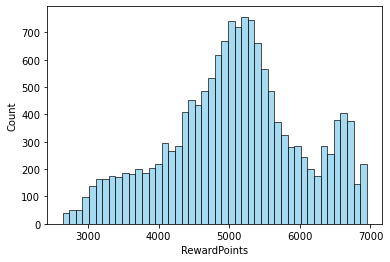

In [74]:
sns.histplot(df["RewardPoints"], color="skyblue")

##### 1.6.2 Removing Outliers on Ratings Variables

After some research and analysis on the subject, we decided not to remove outliers on the two ratings variables that presented outliers in the boxplot visualization. Those are 'PriceQuality' and 'Checkin'. The reason we did not remove them was because they were too many entries that would have to be removed, and if we did, we would effectively be shortening the rating scale for the rating data.

Instead, we will look for straight lining on the ratings entries, meaning people who answered all the answers with the same variable, which can mean they were in a rush and decided to fill the survey as fast as they could.

##### 1.6.1 Removing Outliers on Straight Lining entries to the Ratings Variables

In [75]:
df.columns

Index(['Churn', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService',
       'Gender'],
      dtype='object')

In [76]:
straight_lining_entries = df[(df['Comfort'] == df['ReceptionSchedule']) & (df['Comfort'] == df['FoodDrink']) & (df['Comfort'] == df['Location']) & (df['Comfort'] == df['Wifi']) & (df['Comfort'] == df['Amenities']) & (df['Comfort'] == df['Staff']) & (df['Comfort'] == df['OnlineBooking']) & (df['Comfort'] == df['PriceQuality']) & (df['Comfort'] == df['RoomSpace']) & (df['Comfort'] == df['CheckOut']) & (df['Comfort'] == df['Checkin']) & (df['Comfort'] == df['Cleanliness']) & (df['Comfort'] == df['BarService'])]

In [77]:
straight_lining_entries

,Churn,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender
1548,nochurn,yes,1981,business,single,5289,4,4,4,4,...,4,4,4,4,4,4,4,4,4,1
15259,nochurn,yes,1976,business,single,6699,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1


 #### Removing straight lines

In [85]:
df.drop(straight_lining_entries.index, axis=0, inplace=True)

((15294, 21), (15296, 21))

We found 2 entries that are considered straight lining answers and we will remove them from the data

#### 1.7 Feature Engineering

##### 1.7.1 Creating Age Variable

In [88]:
df['Age'] = date.today().year - df['Year_Birth']

In [89]:
del df['Year_Birth']

In [111]:
age_analysis_col = ['Age', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']
likert_columns = ['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']

In [104]:
df_age_analysys = df[age_analysis_col].groupby('Age').mean()
df_age_analysys.head()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Age,,,,,,,,,,,,,,
8,2.855422,3.445783,2.698795,3.168675,2.987952,3.048193,3.397590,3.349398,3.542169,3.530120,3.783133,3.361446,3.867470,3.216867
9,2.785714,3.142857,2.887755,3.000000,2.948980,2.938776,3.071429,3.051020,3.397959,3.377551,3.816327,3.285714,3.755102,3.000000
10,2.724490,3.346939,2.724490,3.061224,3.020408,2.969388,3.224490,3.142857,3.224490,3.244898,3.581633,3.204082,3.551020,3.071429
11,2.705263,3.200000,2.494737,2.768421,3.210526,2.989474,3.178947,3.284211,3.473684,3.221053,3.673684,3.305263,3.810526,3.273684
12,2.666667,3.200000,2.733333,3.038095,2.971429,2.895238,3.104762,3.038095,3.323810,3.219048,3.600000,3.276190,3.733333,3.019048


In [103]:
df_age_analysys.mean()

Comfort              2.849045
ReceptionSchedule    3.048853
FoodDrink            2.855924
Location             2.994985
Wifi                 3.206002
Amenities            3.262223
Staff                3.415295
OnlineBooking        3.380565
PriceQuality         3.360911
RoomSpace            3.434919
CheckOut             3.607136
Checkin              3.226438
Cleanliness          3.584134
BarService           3.261420
dtype: float64

In [105]:
df_age_analysys - df_age_analysys.mean()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Age,,,,,,,,,,,,,,
8,0.006376,0.396930,-0.157129,0.173690,-0.218051,-0.214030,-0.017705,-0.031167,0.181258,0.095202,0.175997,0.135008,0.283335,-0.044553
9,-0.063331,0.094004,0.031831,0.005015,-0.257023,-0.323448,-0.343866,-0.329545,0.037049,-0.057368,0.209191,0.059277,0.170968,-0.261420
10,-0.124556,0.298086,-0.131435,0.066240,-0.185594,-0.292835,-0.190805,-0.237708,-0.136421,-0.190021,-0.025503,-0.022356,-0.033114,-0.189992
11,-0.143782,0.151147,-0.361188,-0.226564,0.004524,-0.272749,-0.236348,-0.096355,0.112774,-0.213866,0.066549,0.078825,0.226392,0.012264
12,-0.182379,0.151147,-0.122591,0.043110,-0.234574,-0.366985,-0.310533,-0.342470,-0.037101,-0.215871,-0.007136,0.049753,0.149199,-0.242373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.150955,0.201147,0.831576,0.442515,0.293998,0.237777,-0.352795,-0.193065,-0.423411,-0.372419,-0.669636,-0.913938,-0.459134,-0.323920
79,0.150955,0.451147,0.477409,0.505015,-0.206002,-0.928890,-0.915295,-0.213898,-0.027577,0.231748,-0.440469,-1.226438,-0.250801,0.071913
80,0.150955,0.284480,-0.189258,0.005015,1.460664,-0.928890,-0.748628,-0.380565,-0.360911,-0.434919,-0.607136,-0.893104,-0.584134,-1.928087


In [112]:
from scipy.stats import zscore
df_age_zscore = df_age_analysys.apply(zscore)
df_age_zscore[(abs(df_age_zscore[likert_columns]) > 2).any(1)]

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Age,,,,,,,,,,,,,,
72,0.127941,-0.321815,0.782600,0.676118,-2.320468,0.848797,-0.532268,-0.692196,-1.633511,-0.703626,-2.256539,-2.973850,-0.635421,-1.360627
73,0.836713,-0.832546,-0.198070,-0.336806,-2.576567,-0.485528,-0.464055,0.184032,-0.720682,-1.520108,-1.061886,-1.824280,-0.394129,-1.393453
74,-1.808218,0.699647,2.663338,1.005907,-0.886316,-0.194809,-0.054775,-2.992297,-2.514863,-3.491613,-2.999879,-1.086969,-2.746727,-1.935089
75,-1.626703,-1.180771,0.759091,0.016540,-0.348509,-0.820973,0.303345,-0.979709,-4.084771,0.272169,-3.650301,-2.002661,-1.796639,1.684023
76,0.289287,0.482973,1.973734,1.482269,0.547836,-1.168842,0.502301,-4.440508,-2.294525,-3.212815,-2.669506,-0.014037,-2.605973,0.247867
77,5.633891,3.694387,4.285475,4.138903,0.189298,0.744436,-0.144305,1.416229,0.046566,1.840411,-1.791952,-0.337766,-0.846552,0.391483
78,1.096020,0.560357,2.345964,1.459367,1.264912,0.744436,-1.263430,-0.740115,-1.399402,-1.557447,-2.488833,-3.043220,-1.163248,-1.116480
79,1.096020,1.256808,1.346822,1.665485,-0.886316,-2.908185,-3.277855,-0.819980,-0.091145,0.969166,-1.637090,-4.083780,-0.635421,0.247867
80,1.096020,0.792507,-0.533916,0.016540,6.284444,-2.908185,-2.680988,-1.458896,-1.192835,-1.818821,-2.256539,-2.973850,-1.479944,-6.645679


In [113]:
df[df['Age'] > 72]

,Churn,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
182,churn,yes,business,single,6713,3,5,5,5,2,...,3,3,3,3,3,1,3,4,1,75
250,churn,yes,business,suite,5498,3,4,3,4,3,...,3,3,1,4,4,2,3,3,1,79
255,churn,yes,business,double,6439,1,2,2,2,4,...,4,1,1,1,1,1,1,4,0,81
403,churn,yes,business,double,6806,2,4,4,4,5,...,4,2,2,2,2,3,2,3,0,76
425,nochurn,yes,business,double,6936,4,2,2,2,4,...,2,4,4,4,4,3,4,4,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14706,nochurn,yes,business,single,4566,2,2,4,2,3,...,3,4,4,4,5,2,4,1,1,74
15109,nochurn,yes,business,double,6127,5,3,3,3,4,...,1,5,5,5,5,5,5,4,0,73
15132,nochurn,yes,business,single,3300,4,4,4,4,3,...,5,3,3,2,3,4,3,5,1,76
15494,churn,yes,business,single,5369,4,1,1,1,5,...,3,4,4,4,4,3,4,2,1,78


We thought about removing the rows with age less than 10 years old because we considered people this young to not be able to answer properly unless an adult helps them. However, because of the high number of entries, we decided not to remove them.

# TODO GROUP BY AGE AND CHECK MEANS OF ANSWERS

#### 1.8 Creating Dummies and Binary variables

The following variables need dummies: RoomType  
The following variables are binary: Churn, Longevity, TypeTravel

In [379]:
#churn = 1, nochurn = 0
df['Churn'] = [1 if i == 'churn' else 0 for i in df["Churn"]]

In [380]:
#yes = 1, no = 0
df['Longevity'] = [1 if i == 'yes' else 0 for i in df["Longevity"]]

In [381]:
#business = 1, leisure = 0
df['TypeTravel'] = [1 if i == 'business' else 0 for i in df["TypeTravel"]]

In [382]:
df = pd.get_dummies(df, drop_first = True)
df

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,RoomType_single,RoomType_suite
0,1,1,1,4907,3,4,1,4,4,3,...,3,3,3,4,3,4,0,48,1,0
1,0,1,1,6724,1,1,1,1,5,3,...,5,5,5,1,5,2,1,57,1,0
2,1,1,1,4365,3,3,3,3,1,4,...,3,2,3,2,3,1,1,49,1,0
3,0,1,0,3849,1,1,1,1,4,4,...,4,4,4,4,4,3,0,29,0,0
4,0,1,1,5376,2,2,3,2,5,5,...,5,3,4,1,3,5,1,33,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,1,0,1,4968,2,0,2,2,3,2,...,4,5,1,3,4,3,0,34,0,0
15585,1,0,1,4970,3,3,3,3,5,3,...,3,1,3,4,4,5,0,22,0,0
15586,0,1,1,4046,1,1,1,1,3,4,...,4,4,4,5,4,4,1,58,1,0
15587,0,1,0,5155,4,3,4,4,5,4,...,2,5,4,3,4,5,1,30,0,0


#### 1.9 Normalizing variables

Because the variable 'RewardPoints' is in a scale that is very different from the rest, we decided to normalize the dataframe

In [383]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)


In [386]:
df_normalized.head()

,Churn,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,RoomType_single,RoomType_suite
0,1.0,1.0,1.0,0.525986,0.6,0.8,0.2,0.75,0.8,0.6,...,0.50,0.6,0.50,0.75,0.50,0.8,0.0,0.512821,1.0,0.0
1,0.0,1.0,1.0,0.947564,0.2,0.2,0.2,0.00,1.0,0.6,...,1.00,1.0,1.00,0.00,1.00,0.4,1.0,0.628205,1.0,0.0
2,1.0,1.0,1.0,0.400232,0.6,0.6,0.6,0.50,0.2,0.8,...,0.50,0.4,0.50,0.25,0.50,0.2,1.0,0.525641,1.0,0.0
3,0.0,1.0,0.0,0.280510,0.2,0.2,0.2,0.00,0.8,0.8,...,0.75,0.8,0.75,0.75,0.75,0.6,0.0,0.269231,0.0,0.0
4,0.0,1.0,1.0,0.634803,0.4,0.4,0.6,0.25,1.0,1.0,...,1.00,0.6,0.75,0.00,0.50,1.0,1.0,0.320513,1.0,0.0


# TODO CREATE RATING NORMALIZATION BY HAND

#### 1.10 Correlation Matrix

<AxesSubplot:>

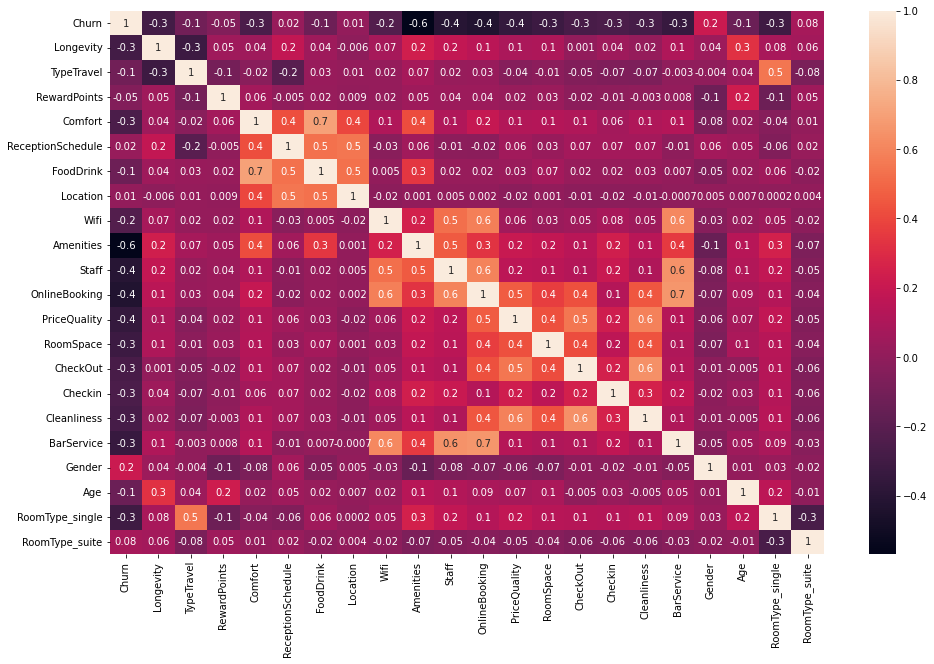

In [387]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [ ]:
likert_questions = df.iloc[:,7:-1]
question_means = likert_questions.mean(axis = 0)
grand_mean = question_means.mean()
sns.barplot(x=question_means.index, y=question_means.values, data=question_means)
plt.ylim(1,5)
plt.show()